# Support Vector Machine (SVM)

Le but de se méthode est de trouver et tracer un hyperplan optimal qui permet de séparer les classes.

les séparateurs de vaste marge SVM (Support Vector Machine) sont un ensemble de techniques d’apprentissage supervisé qui permettent de résoudre les problèmes de classification et de régression. Dans le cas de la classification, le modèle vise à trouver un hyperplan de séparation optimal entre les classes, en maximisant la marge de séparation. Il peut être étendu pour traiter des données non linéaires en utilisant des techniques de noyau, offrant ainsi une grande flexibilité pour modéliser des problèmes de classification complexes.

hyperplan est définie comme:
$$
\beta_{0}+\sum_{i=1}^{n}\beta_{i}X_{i} = 0
$$
la séparation de hyperplan:
$$
\beta_{0}+\sum_{i=1}^{n}\beta_{i}X_{i} > 0 \\
\beta_{0}+\sum_{i=1}^{n}\beta_{i}X_{i} < 0
$$

classfication à marge maximal:
$$
x_1 =
\begin{pmatrix}
x_{1,1} \\
\vdots \\
x_{1,p}
\end{pmatrix},\dots,
x_p =
\begin{pmatrix}
x_{p,1} \\
\vdots \\
x_{p,p}
\end{pmatrix}
$$

maximise the marge M subject to,
$$
\sum_{j=1}^{p} \beta_{j}^{2}=1\\
y_{i} (\beta_{0}+\sum_{j=1}^{p}\beta_{j}x_{ij}) \geq M , \forall i \in {1,\dots,n}
$$

ou bien avec erreur,subject to,
$$
\sum_{j=1}^{p} \beta_{j}^{2}=1\\
\epsilon_{i} > 0 , \sum_{i=0}^{n} \epsilon_{i} \leq C\\
y_{i} (\beta_{0}+\sum_{j=1}^{p}\beta_{j}x_{ij}) \geq M(1-\epsilon_{i})
$$

# Cas pratique

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("data/wine_fraud.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [45]:
df.isna().sum().sum()

np.int64(0)

In [46]:
df['quality'].unique()

<StringArray>
['Legit', 'Fraud']
Length: 2, dtype: str

<Axes: xlabel='quality', ylabel='count'>

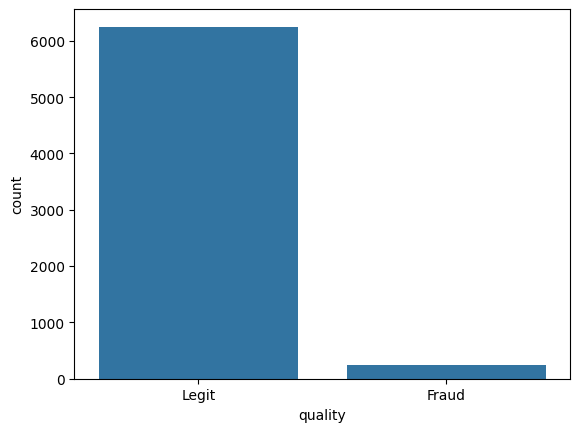

In [47]:
sns.countplot(x='quality', data=df)

<Axes: xlabel='type', ylabel='count'>

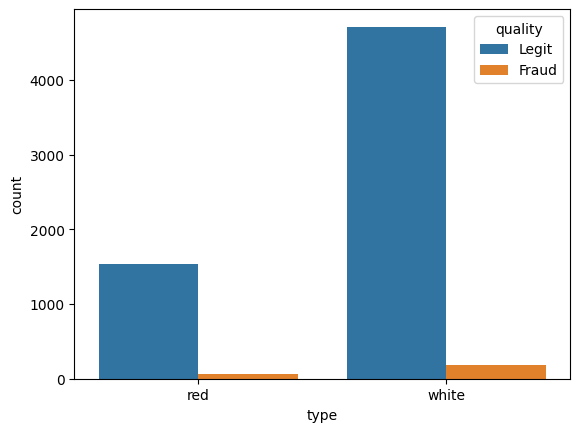

In [48]:
sns.countplot(x='type', data=df, hue='quality')

ajoute une colonne pour analysé le corrélation

In [49]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

<Axes: >

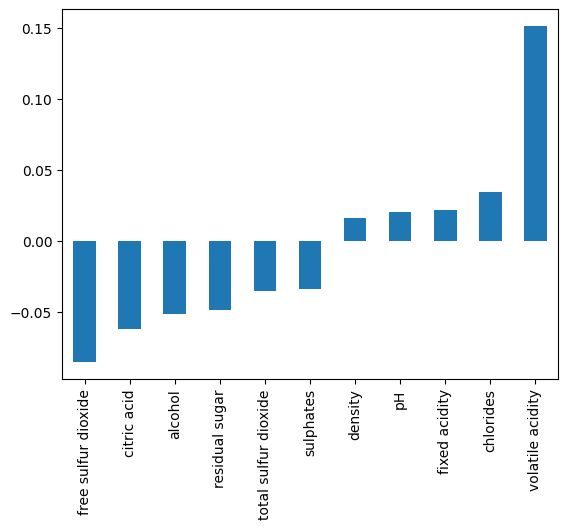

In [50]:
df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')

In [53]:
from sklearn.model_selection import train_test_split

df['type'] = pd.get_dummies(df['type'],drop_first=True)

X = df.drop(columns=['quality', 'Fraud'])
y= df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(class_weight='balanced')

In [57]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.001, 0.1, 0.5, 1], 'kernel':['linear', 'rbf']}

grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_scaled, y_train)
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = grid.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Fraud       0.15      0.69      0.25        49
       Legit       0.99      0.85      0.91      1251

    accuracy                           0.84      1300
   macro avg       0.57      0.77      0.58      1300
weighted avg       0.95      0.84      0.89      1300

Confusion Matrix:
[[  34   15]
 [ 193 1058]]
